In [ ]:
#Question 1-1
Minimize
5.5x1+8.5x2+7.0x3+6.2x4+5.9x5

Subject to
10x1+36x2+15x3+18x4+12x5 >= 1000 #Height
4x1+3.5x2+6x3+3x4+5x5 <= 550 #Feet
6x2+4x3+8x4+6x5 >= 500 #Amount of flowers
x1+x2+x3+x4+x5=100 #units



In [5]:
#Question 1-2
using JuMP, Cbc, NamedArrays
m=Model()

@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@variable(m, x3 >= 0)
@variable(m, x4 >= 0)
@variable(m, x5 >= 0)

@objective(m, Min, 5.5x1+8.5x2+7.0x3+6.2x4+5.9x5)

@constraint(m, 10x1+36x2+15x3+18x4+12x5 >= 1000) #Height
@constraint(m, 4x1+3.5x2+6x3+3x4+5x5 <= 550)#Feet
@constraint(m, 6x2+4x3+8x4+6x5 >= 500) #Amount of flowers
@constraint(m, x1+x2+x3+x4+x5 == 100) #units

set_optimizer(m, Cbc.Optimizer)
optimize!(m)

Presolve 4 (0) rows, 5 (0) columns and 19 (0) elements
0  Obj 0 Primal inf 190.27778 (3)
2  Obj 583.33333
Optimal - objective value 583.33333
Optimal objective 583.3333333 - 2 iterations time 0.002


Now we are going to do a general version of the gardening problem. Suppose that a larger garden can now
include an arbitrary set of P plants. Plant p ∈ P costs cp dollars per plant, and has associated properties
aip for i in some set of properties I (e.g., size, height, number of flowers). For the sake of simplicity,
assume the garden must meet or exceed these properties at a given level bi for i ∈ I (i.e., constraints will
be of the form ≥). The gardener wants to plan exactly m plants in the garden. There is an additional
restriction that the gardener cannot purchase more than up of plant p ∈ P for each type of plant

2-1 Problem 
Formulate a general linear programming that can be used to minimize the cost of planting
this garden.

In [ ]:
#Question 2-1

#decsison variables
Avalible_Footage #how many flowers take up space
Flower_Amount #amount of flowers in each bundle
Unit_Cost #Price of each flower 
Flower_Height #height of flowers
Flower_Size #size of flowers
Avalible_Plants # how many plants professor smith can choose from

#objective
Minimize
Unit_Cost (cp Dollars) #price

#constraints
Avalible_Footage >= 550  #Larger garden according to statement
Flower_Amount == i in set of properties #number of flowers dependent on each type of plant
Unit_Cost <= cp dollars #each plant has a different price
Flower_Height >= i in set of properties #height depends on type of plant
Flower_Size <= i in set of properties #size depends on type of plant
Avalible_Plants >= 5 #there are P types of plants, which we don't know
Avalible_Plants_Purchase <= p in P #Unknown limit of how many of each plant we can purchase


In [6]:
#Question 2-2
using JuMP, Cbc, NamedArrays
#sets
properties = [:height,:flowers,:goodsmell,:beauty,:goodpollinator]
plants = [:p1,:p2,:p3,:p4,:p5,:p6]

#parameters
cost_per_plant = Dict(zip(plants,[5.5,7.3,7.8,6.3,5.0,7.9]))
property_lower_bound = Dict(zip(properties,[315,500,450,400,300]))

using NamedArrays
# array containing amount of property (row) in each plant (column)
prop_per_plant = NamedArray([3.1 4 1.5 1.8 3.3 5
4.3 4.3 1.3 4 1.1 1.7
3.6 1.8 4.6 2.2 1.5 0.7
4 1.6 4.6 4 4 2.8
3.6 4.9 2.6 1.9 1.3 2.4],
(properties,plants),("property","plant"))

# max number of each type of plant is 100
max_buy = 100;

In [3]:
using JuMP, Cbc

m=Model()

#Variables
@variable(m, x[plants] >=0)

#Objective
@objective(m, Min, sum(cost_per_plant[p]*x[p] for p in plants))

#Constraints
@constraint(m, Max_buy[p in plants], (x[p]) <= max_buy)
@constraint(m, properties[prop in properties], sum((prop_per_plant[prop, p] * x[p]) for p in plants) >= property_lower_bound[prop])

set_optimizer(m, Cbc.Optimizer)
optimize!(m)
solution_summary(m, verbose=true)

Presolve 5 (-6) rows, 6 (0) columns and 30 (-6) elements
0  Obj 0 Primal inf 425.28616 (5)
2  Obj 736.50579
Optimal - objective value 736.50579
After Postsolve, objective 736.50579, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 736.5057915 - 2 iterations time 0.002, Presolve 0.00


* Solver : COIN Branch-and-Cut (Cbc)

* Status
  Result count       : 1
  Termination status : OPTIMAL
  Message from the solver:
  "Cbc_status          = finished - check isProvenOptimal or isProvenInfeasible to see if solution found (or check value of best solution)
Cbc_secondaryStatus = unset (status_ will also be -1)
"

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Objective value    : 7.36506e+02
  Objective bound    : 7.36506e+02
  Relative gap       : 0.00000e+00
  Primal solution :
    x[p1] : 1.00000e+02
    x[p2] : 0.00000e+00
    x[p3] : 1.32561e+01
    x[p4] : 1.31918e+01
    x[p5] : 0.00000e+00
    x[p6] : 0.00000e+00

* Work counters
  Solve time (sec)   : 0.00000e+00
  Node count         : 0


In [ ]:
#Problem 3-1

Problem 3-1

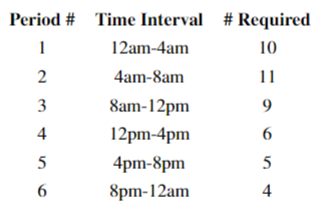

In [ ]:
#m=Model()

#@variable(m, x1>=0)
#@variable(m, x2>=0)
#@variable(m, x3>=0)
#@variable(m, x4>=0)
#@variable(m, x5>=0)
#@variable(m, x6>=0)

#@objective(m, Min, x1+x2+x3+x4+x5+x6)

#@constraint(m, x6+x1 >=10)
#@constraint(m, x1+x2 >=11)
#@constraint(m, x2+x3 >=9)
#@constraint(m, x3+x4 >= 6)
#@constraint(m, x4+x5 >= 5)
#@constraint(m, x5+x6 >= 4)

#set_optimizer(m, Cbc.Optimizer)
#optimize!(m)

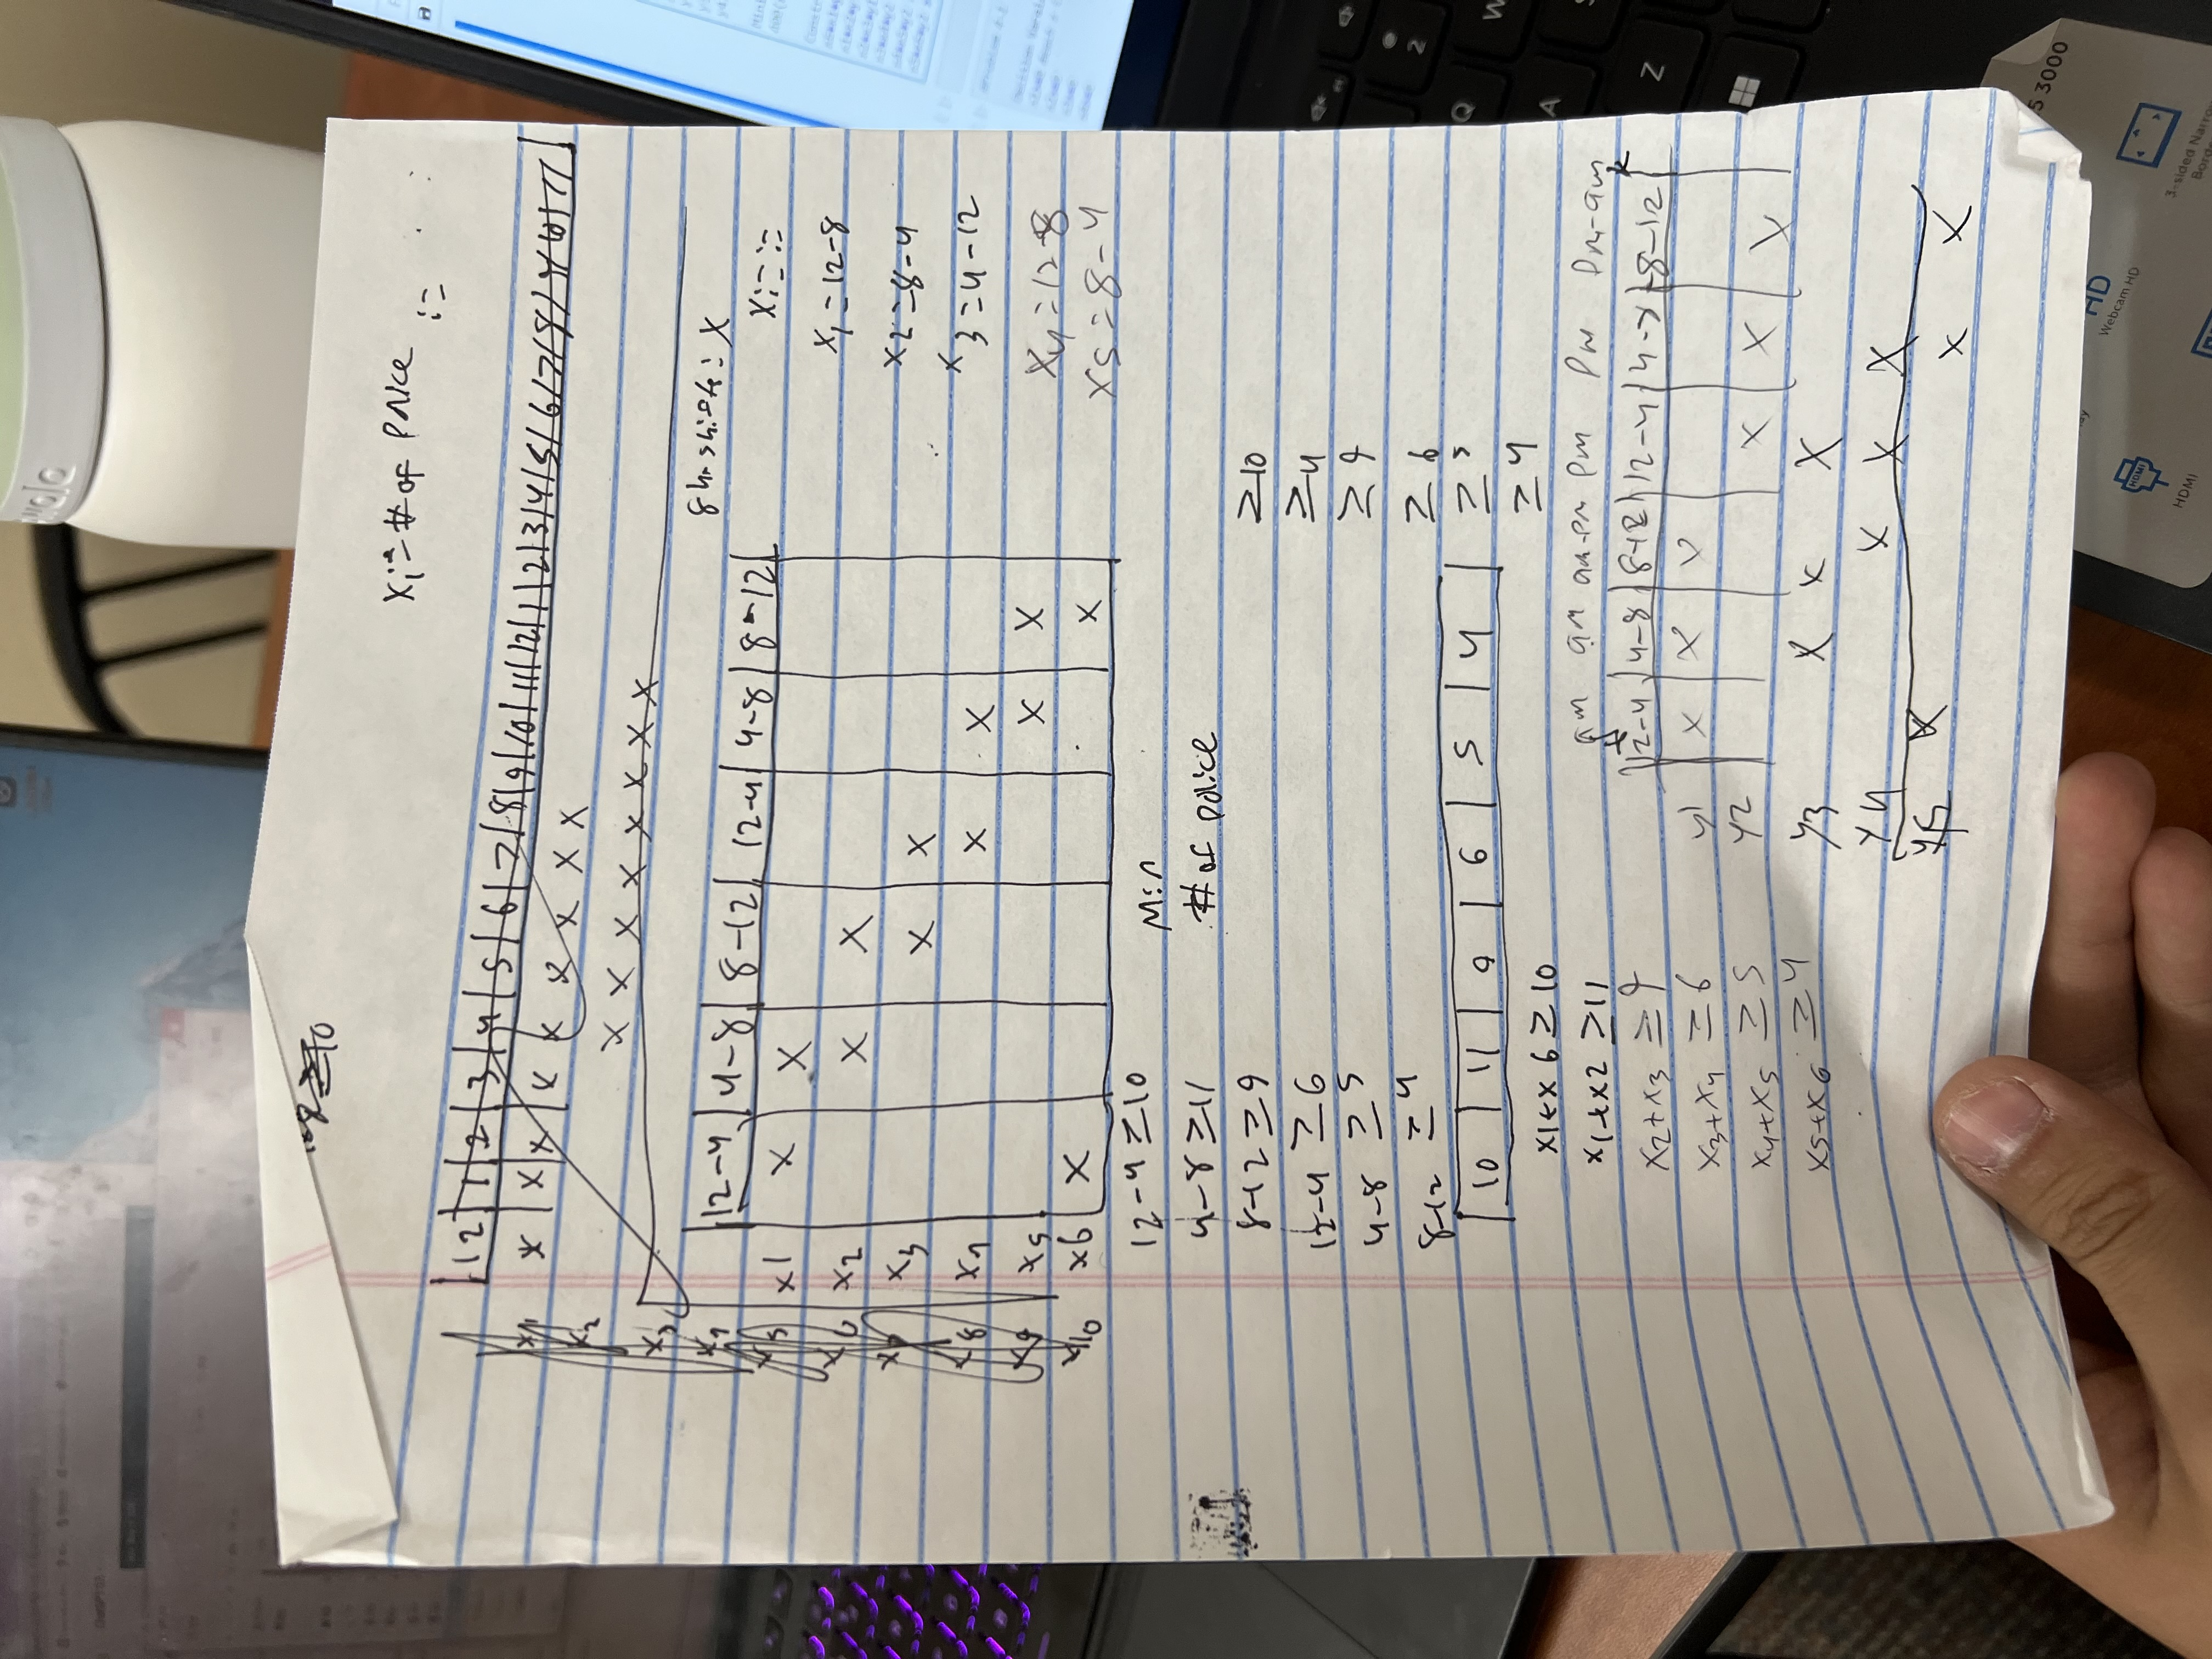

In [ ]:
#problem 3-1

Decision Variables
x1>=0 #x represents 8 hour workers
x2>=0
x3>=0
x4>=0
x5>=0
x6>=0


Minimize
400(x1+x2+x3+x4+x5+x6)

Constraints
x6+x1 >= 10
x1+x2 >= 11
x2+x3 >= 9
x3+x4 >= 6
x4+x5 >= 5
x5+x6 >= 4

In [ ]:
#Problem 3-2

Decision Variables
x1>=0 #x represents 8 hour workers
x2>=0
x3>=0
x4>=0
x5>=0
x6>=0
y1>=0 #y represents 12 hour workers
y2>=0
y3>=0
y4>=0

Minimize
400(x1+x2+x3+x4+x5+x6) + 650(y1+y2+y3+y4)

Constraints
x6+x1+y1 >= 10
x1+x2+y1+y3 >= 11
x2+x3+y1+y3+y4 >= 9
x3+x4+y2+y3+y4 >= 6
x4+x5+y2+y4 >= 5
x5+x6+y2 >= 4

In [ ]:
#Problem 4-1

Decision Varaiables
x1>=0 #each x is a rotation type
x2>=0
x3>=0
x4>=0


Objective
Minimize cost
250x1+200x3+300(x2+x4)


Constraints
x1+x2+x4 >=30
x2 >= 8
x2+x3>=12
x2+x3>=20
x2+x3+x4>=25
x1+x3+x4>=30
x1+x4>=35

In [4]:
#Problem 4-2
m=Model()

@variable(m,x1>=0)
@variable(m,x2>=0)
@variable(m,x3>=0)
@variable(m,x4>=0)

@objective(m, Min,250x1+200x3+300(x2+x4))

@constraint(m,x1+x2+x4 >=30)
@constraint(m, x2 >= 8)
@constraint(m, x2+x3>=15)
@constraint(m,x2+x3>=20)
@constraint(m, x2+x3+x4>=25)
@constraint(m, x1+x3+x4>=30)
@constraint(m,x1+x4>=50)

set_optimizer(m, Cbc.Optimizer)
optimize!(m)

Presolve 5 (-2) rows, 4 (0) columns and 13 (-3) elements
0  Obj 2400 Primal inf 131 (5)
3  Obj 17550
Optimal - objective value 17550
After Postsolve, objective 17550, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 17550 - 3 iterations time 0.002, Presolve 0.00
